# DATA 201 Project 2

Project Requirements

1. Introduction: Give the details on the source of your data, its content, and some
questions you are interested in. The data should have at least 1000 rows
2. Prepare and wrangle your data with Pandas and Numpy
3. Use EDA principles and the Matplotlib / Seaborn packages to visualize the data.
4. Use scikit-learn DecisionTree Classification or Regression to train, test and predict
a categorical or quantitative target variable respectively. Use appropriate metric and
interpret the meaning of the score.
5. In the case of classification, predict the classes of the test data. Predict the class
probability of the test data
6. Plot the tree with tree.plot_tree after the training
7. Interpret the result of the algorithm
8. Submit a link to the GitHub URL and Present in the class

# Data Info

For my project, I have chosen the dataset "wine.csv," which I found on Kaggle in the PyCaret library called "beginner_datasets" from the link of Kaggle datasets Professor Mohamed sent us:

https://www.kaggle.com/ahmettezcantekin/beginner-datasets

The dataset contains 6,497 rows and 13 columns:


*   Fixed Acidity
*   Volatile Acidity
*   Citric Acid
*   Residual Sugar
*   Chlorides
*   Free Sulfur Dioxide
*   Total Sulfur Dioxide
*   Density
*   pH
*   Sulphates
*   Alcohol
*   Quality
*   Type















# Questions of Interest

*   What variables are most predictive of wine type?









In [71]:
# read in data
import pandas as pd
wine = pd.read_csv('wine.csv') 

In [72]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [73]:
wine.shape

(6497, 13)

In [74]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type                     object
dtype: object

In [75]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


#Use Seaborn package to visualize the data

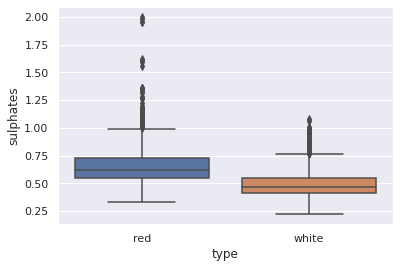

In [76]:
import seaborn as sns

type_by_sulphates = sns.boxplot(x="type",
                        y="sulphates",
                        data=wine)
plt.show()

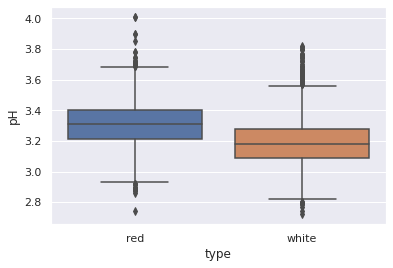

In [77]:
type_by_ph = sns.boxplot(x="type",
                        y="pH",
                        data=wine)
plt.show()

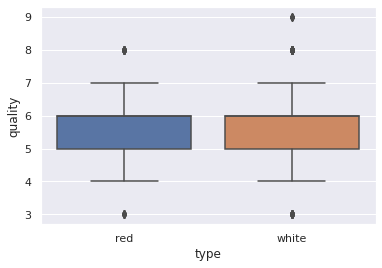

In [78]:
type_by_quality = sns.boxplot(x="type",
                        y="quality",
                        data=wine)
plt.show()

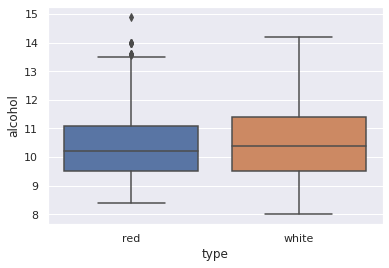

In [79]:
type_by_alcohol = sns.boxplot(x="type",
                        y="alcohol",
                        data=wine)
plt.show()

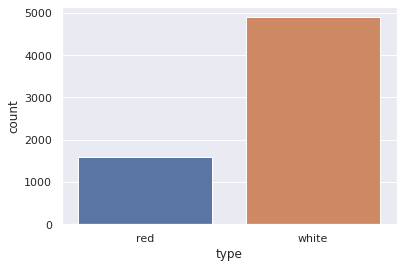

In [80]:
type_count =  sns.countplot(x="type", data=wine)

plt.show()

# DecisionTree Classification

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error as MSE

In [82]:
X = wine.drop(['type'], axis=1)
y = wine['type']

In [83]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [84]:
y[0:10]

0    red
1    red
2    red
3    red
4    red
5    red
6    red
7    red
8    red
9    red
Name: type, dtype: object

#Encoding the Categorical Target Variable

We will encode Red as 1 and White as 0

In [85]:
y = wine['type'].map({'red':1, 'white':0})
y[0:10]

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: type, dtype: int64

In [86]:
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2,random_state=99)

clf = DecisionTreeClassifier(criterion='entropy', random_state=99)

#Run Two Accuracy Tests

In [87]:
clf.fit(X_train,y_train)
y_pred= clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9884615384615385

In [88]:
accuracy = float(np.sum(y_pred==y_test))/y_test.shape[0]
accuracy

0.9884615384615385

# Find the precision and recall

In [89]:
from sklearn.metrics import precision_score, recall_score
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))


Precision: 0.9867986798679867
Recall: 0.964516129032258


#Plot Tree with tree.plot_tree

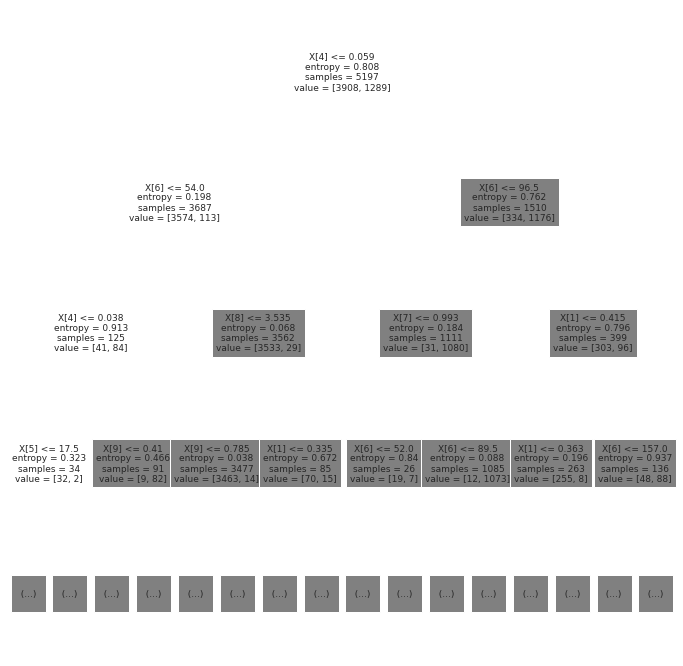

In [90]:
from sklearn import tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(decision_tree=clf, max_depth= 3,fontsize=9);

From the decision tree we see that X[4], which is the Chlorides variable, is the most predictive of wine type. By looking at the top of the tree, we can tell that if chlorides in a wine are > 0.059 it's almost certainly red. 

In [91]:
from sklearn.ensemble import RandomForestClassifier
rf_cl = RandomForestClassifier(n_estimators=100,
                            random_state=11)
rf_cl.fit(X_train, y_train)
rf_pred= rf_cl.predict(X_test)
accuracy = float(np.sum(rf_pred==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

accuracy: 0.994615


In [92]:
xg_cl = xgb.XGBClassifier(objective='binary:logistic', max_depth=10, n_estimators=20, seed=99) 
xg_cl.fit(X_train, y_train)
preds = xg_cl.predict(X_test)
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

accuracy: 0.990000


In [93]:
wine_dmatrix = xgb.DMatrix(data=X,label=y) 
params={"objective":"binary:logistic","max_depth":4}
cv_results = xgb.cv(dtrain=wine_dmatrix, params=params, nfold=4,num_boost_round=10, metrics="error", as_pandas=True) 
print("Accuracy: %f" %((1-cv_results["test-error-mean"]).iloc[-1]))

Accuracy: 0.991072


In [94]:
# Find the breakdown of the predictive labels
sum(preds)/len(preds)

0.23307692307692307

In [95]:
(wine.type == 'red').sum()

1599

In [96]:
(wine.type == 'white').sum()

4898

In [97]:
1599/6497*100

24.611359088810218

As you can see above, red wine was predicted 23.3% of the time and red wines account for 24.6% of the dataset, so this is a pretty accurate prediction.